## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns
df = application_df.drop(columns=["EIN", "NAME", "SPECIAL_CONSIDERATIONS"])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   STATUS            34299 non-null  int64 
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.4+ MB


In [4]:
df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
count = df['APPLICATION_TYPE'].value_counts()
print(count)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = df['APPLICATION_TYPE'].value_counts().index[9:]

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classes = df["CLASSIFICATION"].value_counts()
classes

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df["CLASSIFICATION"].value_counts()[df["CLASSIFICATION"].value_counts()> 1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classes[classes < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric = pd.get_dummies(df)
numeric

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = numeric["IS_SUCCESSFUL"]
X = numeric.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,142590,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,1,5000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=42))

nn.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 258       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


In [14]:
import os
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimized/",exist_ok=True)
checkpoint_dir = "checkpoints_optimized/weights.{epoch:02d}.hdf5"

In [15]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [16]:
from keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback that saves the model's weights every 5 epochs
checkpoint = ModelCheckpoint(filepath = checkpoint_dir, monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=5)

# Train the model
fit = nn.fit(X_train_scaled,y_train, epochs=120, callbacks=[checkpoint])

Epoch 1/120
804/804 [==============================] - 1s 795us/step - loss: 0.6341 - accuracy: 0.6569
Epoch 2/120
804/804 [==============================] - 1s 719us/step - loss: 0.5754 - accuracy: 0.7243
Epoch 3/120
804/804 [==============================] - 1s 735us/step - loss: 0.5649 - accuracy: 0.7259
Epoch 4/120
804/804 [==============================] - 1s 818us/step - loss: 0.5613 - accuracy: 0.7260
Epoch 5/120
772/804 [===========================>..] - ETA: 0s - loss: 0.5585 - accuracy: 0.7274
Epoch 5: loss improved from inf to 0.55886, saving model to checkpoints_optimized\weights.05.hdf5
804/804 [==============================] - 1s 873us/step - loss: 0.5589 - accuracy: 0.7274
Epoch 6/120
804/804 [==============================] - 1s 836us/step - loss: 0.5571 - accuracy: 0.7274
Epoch 7/120
804/804 [==============================] - 1s 846us/step - loss: 0.5558 - accuracy: 0.7275
Epoch 8/120
804/804 [==============================] - 1s 828us/step - loss: 0.5547 - accuracy: 

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5550 - accuracy: 0.7252 - 261ms/epoch - 974us/step
Loss: 0.5550227761268616, Accuracy: 0.7252478003501892


<AxesSubplot:>

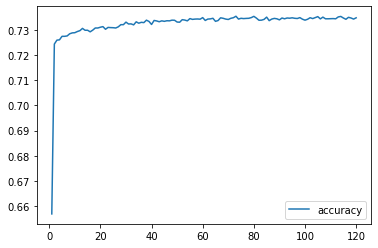

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit.history, index=range(1,len(fit.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [19]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")